# Homework 2024

**Name**: ROUILLARD

**Surname**: Pierre

After completing the following questions, send the edited notebook to
`pablo.winant@ensae.fr`. You can work in (small) teams but are not
allowed to copy/paste any code. Don’t forget to comment your code and
take any initiative you find relevant.

## General Problem

We seek to solve numerically the following **consumption-saving problem using the time-iteration algorithm.**

**Income is an iid normally distributed process** with standard deviation
$\sigma$. Interest rate is $r\in [1,\frac{1}{\beta}[$ where
$\beta\in]0,1[$ is the discount factor.

Available income is $w_t$ and follows the law of motion:

$$w_{t+1} = e^ {\epsilon_{t+1}} +  (w_{t} - c_{t}) r$$

where $c_t \in ]0,w_t]$ is consumption chosen at date $t$ (which
includes an **implicit no borrowing constraint**).

## Calibration

We will use the following calibration:

$\sigma = 0.01$

$\beta = 0.96$

$r = 1.03$

**Choose a structure `model` to represent the model parameters.**

In [1]:
using Interpolations, Plots, Statistics, Distributions

In [2]:
model = (;
        σ = 0.01,
        β = 0.96,
        r = 1.03)

d = Normal(0,model.σ)

Normal{Float64}(μ=0.0, σ=0.01)

## (1) Representing the decision function

The solution of the model is a ***decision rule*** $c(w)$.

In what follows, we will approximate it by a function defined over
$[0,w_{max}[$, pinned down by the values it takes on $N$ linearly spaced
grid points.

In our solutions algorithm, we will use the **initial guess**
$\varphi_0(w) = min(w, p_0+p_1(w-p_0))$.

**Create a structure `approx` to represent the approximation space. This
structure should contain the parameters, as well as a
`points::Vector{Float64}` array coontaining the (regularly spaced) list
of grid points.**

To start with you can take $w_{max}=5$, $N=20$, $p_0=0.95, p_1=0.03$ but
don’t hesitate to change these values later if needed.

In [3]:
approx = (;
        wmax = 5,
        N = 20,
        p_0 = 0.95,
        p_1 = 0.03,
        points = Array(LinRange(0,5,20)))

(wmax = 5, N = 20, p_0 = 0.95, p_1 = 0.03, points = [0.0, 0.2631578947368421, 0.5263157894736842, 0.7894736842105263, 1.0526315789473684, 1.3157894736842104, 1.5789473684210527, 1.8421052631578947, 2.1052631578947367, 2.3684210526315788, 2.631578947368421, 2.8947368421052633, 3.1578947368421053, 3.4210526315789473, 3.6842105263157894, 3.947368421052632, 4.2105263157894735, 4.473684210526316, 4.7368421052631575, 5.0])

**Define a method `φ_0(w::Float64)::Float64` for the initial guess. Plot
it against $w$ in the approximation space.**

**Compute the values `c_0::{Float64}`of `φ_0()` on the grid `points`**

**Use the `Interpolations.jl` library to define a function
`φ(w::Float64)` defined for any `w` using piecewise *linear*
interpolation in such a way that it takes values `c_0` on the grid
`points`.**

**Create a single plot with**:

-   the function `φ_0()`
-   the interpolated function $φ$
-   its values `c_0` on the grid points

**Bonus: add to the graph the function obtained using cubic spline
interpolation. What *could* be the problem?**

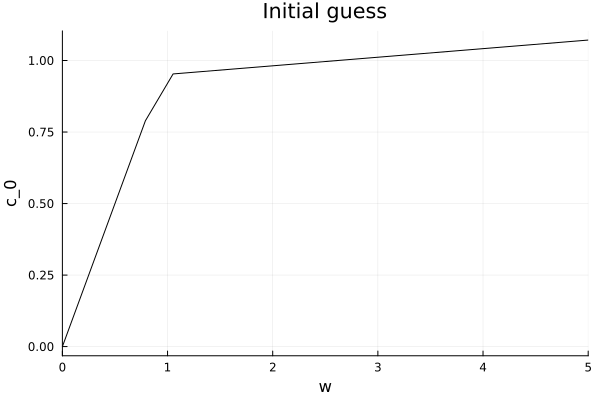

In [4]:
function φ_0(w::Float64)
    return min(w,approx.p_0 + approx.p_1*(w-approx.p_0))
end

c_0 = φ_0.(approx.points)

fig = plot(xlim=(0,approx.wmax), legend=:bottomright, title="Initial guess", xaxis="w", yaxis="c_0")
plot!(fig, approx.points, c_0, c=:black, label="")

In [5]:
#! Linear interpolation of φ_0 
φ = linear_interpolation(approx.points,c_0)

println(φ(5.0)) # point on the grid
println(φ(0.1)) # point not on the grid : interpolate

1.0715
0.1


## (2) Discretizing $\epsilon_{t+1}$

**Represent the shock $\epsilon$ by two vectors $(e_1, ... e_q)$ and
$(l_1, ..., l_q)$ with $q=10$ such that for a suitable function $g$ we
can approximate $E_{\epsilon} (g(\epsilon))$ by $\sum_{i=1}^q l_i e_i$
.**

(choose the method you want)

In [24]:
median(d,[-100,-1])

MethodError: MethodError: no method matching median(::Normal{Float64}, ::Vector{Int64})

Closest candidates are:
  median(::Normal)
   @ Distributions ~/.julia/packages/Distributions/fgrZq/src/univariate/continuous/normal.jl:68
  median(::UnivariateDistribution)
   @ Distributions ~/.julia/packages/Distributions/fgrZq/src/univariates.jl:189
  median(::Any)
   @ Statistics /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Statistics/src/Statistics.jl:858


In [19]:
# Monte Carlo : Ê[f(X)] := 1/N.sum(f(x_i)) 
# Quantization using quantiles to aleviate MC's need of a large nb of observations to be precise

#e = ..
#l = ..

quantile.(d, [i*1/20 for i=1:20])[j+2 for j=-1:]

9-element Vector{Float64}:
 -0.012815515655446004
 -0.008416212335729143
 -0.005244005127080408
 -0.002533471031357997
  0.0
  0.002533471031357997
  0.0052440051270804065
  0.008416212335729143
  0.012815515655446004

In [27]:
range(1,5,2)

1.0:4.0:5.0

In [26]:
quantile.(d, [i*1/20 for i=1:20])

20-element Vector{Float64}:
 -0.01644853626951473
 -0.012815515655446004
 -0.010364333894937896
 -0.008416212335729143
 -0.006744897501960818
 -0.005244005127080408
 -0.0038532046640756767
 -0.002533471031357997
 -0.0012566134685507403
  0.0
  0.0012566134685507416
  0.002533471031357997
  0.0038532046640756767
  0.0052440051270804065
  0.006744897501960818
  0.008416212335729143
  0.010364333894937896
  0.012815515655446004
  0.01644853626951472
 Inf

**Test that it works by computing
$E_{\epsilon} \left[ \epsilon^2 \right]$.**

**Redefine `approx` so as to include the discretized shock**

## (3) Euler equation

**Write down the Euler equation, paying attention to the slackness
condition.**

It should be of the form
$$0 \leq \underbrace{E_t \left[ f(w_t, c_t, w_{t+1}, c_{t+1}, \epsilon_{t+1}) \right]}_{\Phi_t} \perp c_t \leq w_t$$

where $f$ is a function to be explicited.

**The objective function is :**

$$ 
V(w_0) :: \max_{ \color{red}{\{ c_t, i_t, w_{t+1} \}}_{t\geq 0} } E_0 \left[ \sum_{t} \beta^t U(c_t) \right] \\ \; \\
s.c \; \begin{cases} \begin{align*} 
    w_{t+1} & = e^ {\epsilon_{t+1}} +  r i_t \\
    i_t & = w_t - c_t \end{align*} \\
    w_{t+1} > 0, \; c_t > 0 \\
    i_t\geq 0 \quad \textrm{{\color{red}\textit{credit constraint}}}
\end{cases}
$$

- $\textrm{\textbf{Pre-determined / State variables}}$
    - $w_t$ is a **pre-determined** variable at date $t$ = **state variables**
    - $c_t$ and $i_t$ are **optimized upon** at date $t$ = **control variables**

$\textrm{\color{blue}\textbf{Lagrangian solution}}$

$$ 
V(w_0) :: \max_{ \color{red}{\{ c_t, w_{t+1} \}}_{t\geq 0} } E_0 \left[ \sum_{t} \beta^t U(c_t) \right] \\ \; \\

s.c \; \begin{cases} \begin{align*} 

w_{t+1} & = e^ {\epsilon_{t+1}} +  r (w_t - c_t) & \Rightarrow & \; {\color{red}\lambda_t} \; (\geq 0)\\

c_t & > 0 & \Rightarrow & \; {\color{red}\mu_t} \; (\geq 0)\\

w_{t+1} & > 0 & \Rightarrow & \; {\color{red}q_t} \; (\geq 0)\\

c_t & \leq w_t \rightarrow w_t - c_t \geq 0 & \Rightarrow & \; {\color{red}\nu_t} \; (\geq 0) \quad \textrm{{\color{red}\textit{credit constraint}}} \\

\end{align*} \end{cases}
$$

$$\Rightarrow \textrm{{5 variables}}$$ 

$$\forall t \geq 0 \qquad 
\mathcal{L}_t = E_t\left[ \sum_{s \geq 0} \beta^{t+s}
\left\{ \; U(c_{t+s}) + {\color{green} \mu_s} [c_{t+s}] + {\color{green} q_s} [w_{t+1+s}] + {\color{green} \nu_s} [w_{t+s} - c_{t+s}] + {\color{green} \lambda_s} [e^ {\epsilon_{t+s+1}} +  r (w_{t+s} - c_{t+s}) - w_{t+s+1}] \; \right\} \right]
$$

$$\textrm{\textbf{2 FOCs : }} \qquad \forall s \geq 0 \quad \begin{cases} \begin{align*} 
\frac{\partial \mathcal{L}_t}{\partial c_{t+s}} & = & 0 \\ 
\frac{\partial \mathcal{L}_t}{\partial w_{t+1+s}} & = & 0 \\
\end{align*} \end{cases}
$$

$$\textrm{\textbf{Karush-Kuhn-Tucker {\color{blue}complementary slackness condition} (at optima) : }}$$ 
$$
\begin{cases} \begin{align*}
{\color{blue}\mu_s} & = 0 \quad & \textrm{or} \quad & c_{t+s} = 0 & \rightarrow & \; \textrm{Impossible otherwise $U'(0) = \infty $ } \\
{\color{blue}q_s}   & = 0 \quad & \textrm{or} \quad & w_{t+s+1} = 0 & \rightarrow & \; \textrm{Impossible because $e^ {\epsilon_{t+1+s}}>0$ } \\
\end{align*} \end{cases}
$$
$$
\textrm{\textbf{\textit{and} }} \qquad \begin{cases} \begin{align*}
e^ {\epsilon_{t+s+1}} +  r (w_{t+s} - c_{t+s}) - w_{t+s+1} & \geq 0 \; {\color{red}\perp} \; \lambda_{t+s} \geq 0 \\
w_{t+s} - c_{t+s} & \geq 0 \; {\color{red}\perp} \; \nu_{t+s} \geq 0 \quad \textrm{{\color{red}\textit{credit constraint}}}
\end{align*} \end{cases}
$$

$$\textrm{\textbf{FOCs ({\color{red}\textit{NO credit constraint}}) : }} \forall s \geq 0 \quad 
\begin{cases} \begin{align*} 
\frac{\partial \mathcal{L}_t}{\partial c_{t+s}}   & = & \beta^{t+s} E_t \left\{ \; U'(c_{t+s}) - r\lambda_s \right\} \\ 
\frac{\partial \mathcal{L}_t}{\partial w_{t+1+s}} & = & E_t \left\{ \beta^{t+1+s}r\lambda_{s+1} - \beta^{t+s}\lambda_{s} \right\} \\
\end{align*} \end{cases}

\quad \rightarrow \quad

\begin{cases} \begin{align*} 
E_t \left\{ \; U'(c_{t+s})\right\} & = & r\lambda_s \\ 
\beta r\lambda_{s+1}               & = & \lambda_{s} \\
\end{align*} \end{cases}
$$

$$ \textrm{\textbf{Optimality condition - Euler equation ({\color{red}\textit{NO credit constraint}}) : \quad }} 
r \beta E_t \left\{ \; \frac{U'(c_{t+1})}{U'(c_{t})} \; \right\} = 1
$$

$$\textrm{\textbf{FOCs ({\color{red}\textit{WITH credit constraint}}) : }} \forall s \geq 0 \quad 
\begin{cases} \begin{align*} 
\frac{\partial \mathcal{L}_t}{\partial c_{t+s}}   & = & \\ 
\frac{\partial \mathcal{L}_t}{\partial w_{t+1+s}} & = & \\
\end{align*} \end{cases}

\quad \rightarrow \quad

\begin{cases} \begin{align*} 
 & = &  \\ 
 & = &  \\
\end{align*} \end{cases}
$$

**Define the function `Phi(w::Float64,c::Float64,φ::Fun, model, approx)`
which approximates the residuals of the euler equation given the
available income today, the consumption choice today, the consumption
*function* tomorrow and the model/approx structures.**

On a $ E_t[c_{t+1}] = E_{\epsilon_{t+1}}[\tilde{φ}(w_{t+1}(\epsilon_{t+1}))] $ où $\tilde{φ}$ = consumption function **tomorrow** => utiliser question précédente calcul espérance

**Overload `Phi` function with another method
`Phi(w::Float64,c::Float64,φ::Fun, model, approx, slackness=true)` which
uses the Fisher-Burmeister transform to *incorporate the credit constraint*.**

**Plot the optization residuals (i.e. values of $\Phi_t$) corresponding
to the initial guess function with and without the complementarity
constraints.**

## (4) Time Iteration

**(prep): Assuming the initial guess $φ_0()$ is the decision rule
followed tomorrow, determine, for a given value `w` in the state-space,
the optimal consumption choice made today. This can be achieved by
feeding the appropriate function into the right nonlinear root-finder.**

**(prep): Find the vector of all the optimal consumption choices on the
grid today, given the decision rule tomorrow.**

**Plot the optimization residuals (i.e. values of $\Phi_t$) for the
initial guess function**

**Write down the time-iteration algorithm.**

You can use the course as reference and/or repeat the recurrence steps
below:

-   given an initial guess for the consumption vector `c0`
-   create a function defined `φ` on `[0,wmax]` which interpolates `c0`
    on the grid
-   for each grid point `w` in the grid, solve the system
    `u->Phi(w,u,φ, model, approx, slackness=true)`
    -   store the result as a vector `c1`
-   check whether `c1` is close to `c0`
    -   yes: check the system is indeed solved and return
    -   no: start again with `c1` as `c0`

In [1]:
# here is a placeholder implementation to help you structure your program.
#  feel free to modify or discard


"""
φ: Float64->Float64 Initial guess for the consumption function
model: parameters representing the model
approx: parameters defining the approximation and solution method
K: max number of iterations
... other parameters for you to choose
"""
function time_iteration(φ0, model, approx; K=200, ... )

    # ...

    # convert initial function φ0 into a consumption vector by evaluating φ on the grid
    # c0 = ... :: Vector{Float64}

    for k=1:K

        # convert consumption vector c0 into a function φ
        # φ = ...

        #! solve for the optimal consumption for all grid points
        # ...
        # c1  :: Vector{Float64}

        # check distance between c0 and c1

        # η = ...

        # if distance is small return function `varphi`

    end




end

Base.Meta.ParseError: ParseError:
# Error @ /Users/prld/git/NUM3A/Pushups/Homework_2024.ipynb:12:51
"""
function time_iteration(φ0, model, approx; K=200, ... )
#                                                 └─┘ ── invalid identifier

**Check that the value returned by `time_iteration` is actually a
solution to the system. How fast is the convergence? Graphical
representation.**

## Bonuses

**(easy): perform some sensitivity analysis on the model to explain the
effect of the main parameters**

**(medium): Give the solution to the above problem, simulate the law of
motion for the available income. Find a way to plot the distriution of
that income over a long period of time.**

**(hard): Propose and implement some ideas to speed up the solution
process.**

One promising avenue consists in solving for all consumption values at
all grid points as one single system of equation after recognizing that
the jacobian of this particular system has a specific structure.